In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Reading Data

In [2]:
ti_df = pd.read_csv('travel insurance.csv')

In [3]:
ti_df.head()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
0,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,81
1,CBH,Travel Agency,Offline,Comprehensive Plan,No,186,MALAYSIA,-29.0,9.57,F,71
2,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,65,AUSTRALIA,-49.5,29.70,NaN,32
3,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,60,AUSTRALIA,-39.6,23.76,NaN,32
4,CWT,Travel Agency,Online,Rental Vehicle Excess Insurance,No,79,ITALY,-19.8,11.88,NaN,41


In [4]:
ti_df.tail()

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Gender,Age
63321,JZI,Airlines,Online,Basic Plan,No,111,JAPAN,35.0,12.25,M,31
63322,JZI,Airlines,Online,Basic Plan,No,58,CHINA,40.0,14.00,F,40
63323,JZI,Airlines,Online,Basic Plan,No,2,MALAYSIA,18.0,6.30,M,57
63324,JZI,Airlines,Online,Basic Plan,No,3,VIET NAM,18.0,6.30,M,63
63325,JZI,Airlines,Online,Basic Plan,No,22,HONG KONG,26.0,9.10,F,35


In [5]:
ti_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63326 entries, 0 to 63325
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Agency                63326 non-null  object 
 1   Agency Type           63326 non-null  object 
 2   Distribution Channel  63326 non-null  object 
 3   Product Name          63326 non-null  object 
 4   Claim                 63326 non-null  object 
 5   Duration              63326 non-null  int64  
 6   Destination           63326 non-null  object 
 7   Net Sales             63326 non-null  float64
 8   Commision (in value)  63326 non-null  float64
 9   Gender                18219 non-null  object 
 10  Age                   63326 non-null  int64  
dtypes: float64(2), int64(2), object(7)
memory usage: 5.3+ MB


7 Categorical Features
4 Numerical Features where 2 are intergers and 2 are floats

# Checking Missing Values

In [6]:
# Missing Values in percentages
((ti_df.isnull().sum())/ti_df.index.values.max())*100

Agency                   0.000000
Agency Type              0.000000
Distribution Channel     0.000000
Product Name             0.000000
Claim                    0.000000
Duration                 0.000000
Destination              0.000000
Net Sales                0.000000
Commision (in value)     0.000000
Gender                  71.230951
Age                      0.000000
dtype: float64

The only Gender has the missing values, which are 71.23% of overall observations.

In [7]:
# Removing Gender Feature
ti_df.drop('Gender',axis=1,inplace=True)

# Descriptive Statistics

In [8]:
ti_df.describe(include='all')

,Agency,Agency Type,Distribution Channel,Product Name,Claim,Duration,Destination,Net Sales,Commision (in value),Age
count,63326,63326,63326,63326,63326,63326.000000,63326,63326.000000,63326.000000,63326.000000
unique,16,2,2,26,2,NaN,149,NaN,NaN,NaN
top,EPX,Travel Agency,Online,Cancellation Plan,No,NaN,SINGAPORE,NaN,NaN,NaN
freq,35119,45869,62219,18630,62399,NaN,13255,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,49.317074,NaN,40.702018,9.809992,39.969981
std,NaN,NaN,NaN,NaN,NaN,101.791566,NaN,48.845637,19.804388,14.017010
min,NaN,NaN,NaN,NaN,NaN,-2.000000,NaN,-389.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,18.000000,0.000000,35.000000
50%,NaN,NaN,NaN,NaN,NaN,22.000000,NaN,26.530000,0.000000,36.000000
75%,NaN,NaN,NaN,NaN,NaN,53.000000,NaN,48.000000,11.550000,43.000000


* Their is notably large difference between 75% and max value.
* Most of the insurances are not claimed.
* "Cancellation Plan" is most popular product.
* "EPX" is most popular insurance agency.

# Uni-variate Analysis

<AxesSubplot:title={'center':'Claim'}>

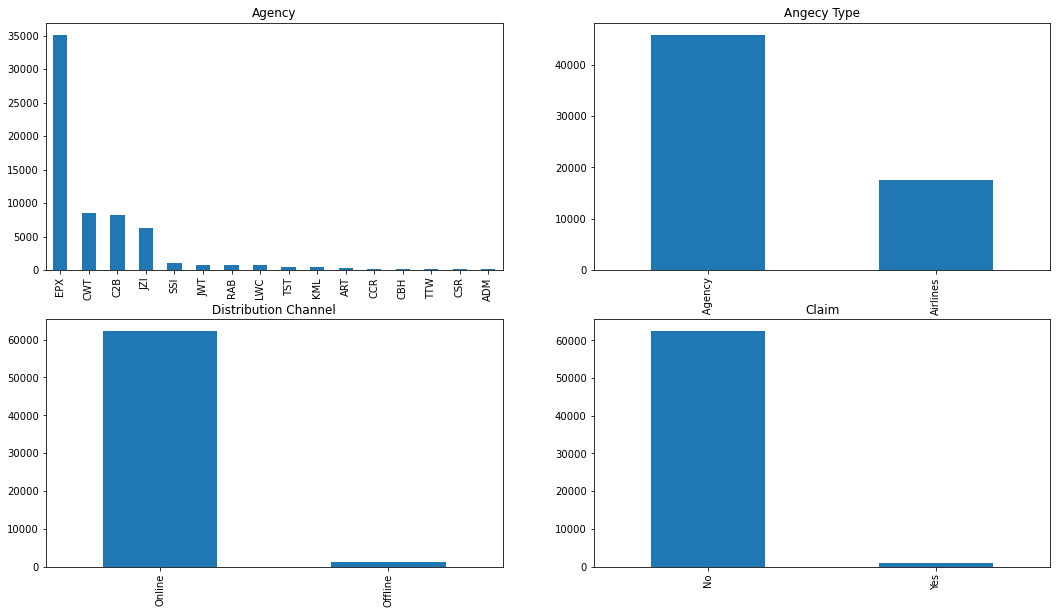

In [9]:
fig = plt.figure(figsize=(18,10))

plt.subplot(2,2,1)
ti_df['Agency'].value_counts().plot(kind='bar',title='Agency')

plt.subplot(2,2,2)
ti_df['Agency Type'].value_counts().plot(kind='bar',title='Angecy Type')

plt.subplot(2,2,3)
ti_df['Distribution Channel'].value_counts().plot(kind='bar',title='Distribution Channel')

plt.subplot(2,2,4)
ti_df['Claim'].value_counts().plot(kind='bar',title='Claim')

* "EPX" is most popular in the customers.
* "CWT","C2B" and "JZI" are moderate popular in the customers.
* Most of the insurance are not claimed.
* Most customers purchase travel insurance from Travel Agency.

<AxesSubplot:title={'center':'Products'}>

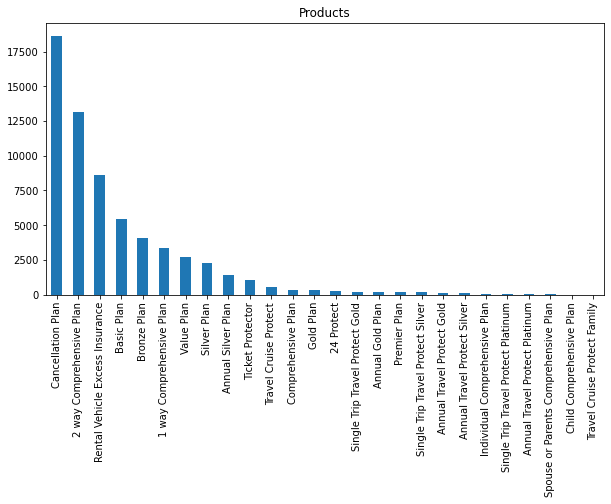

In [10]:
ti_df['Product Name'].value_counts().plot(kind='bar',title='Products',figsize=(10,5))

* "Cancellation Plan" is most popular product.
* "2 way Comprehensive Plan" and "Rental Vehicle Excess Insurance" this are good product.

<AxesSubplot:title={'center':'Destination'}>

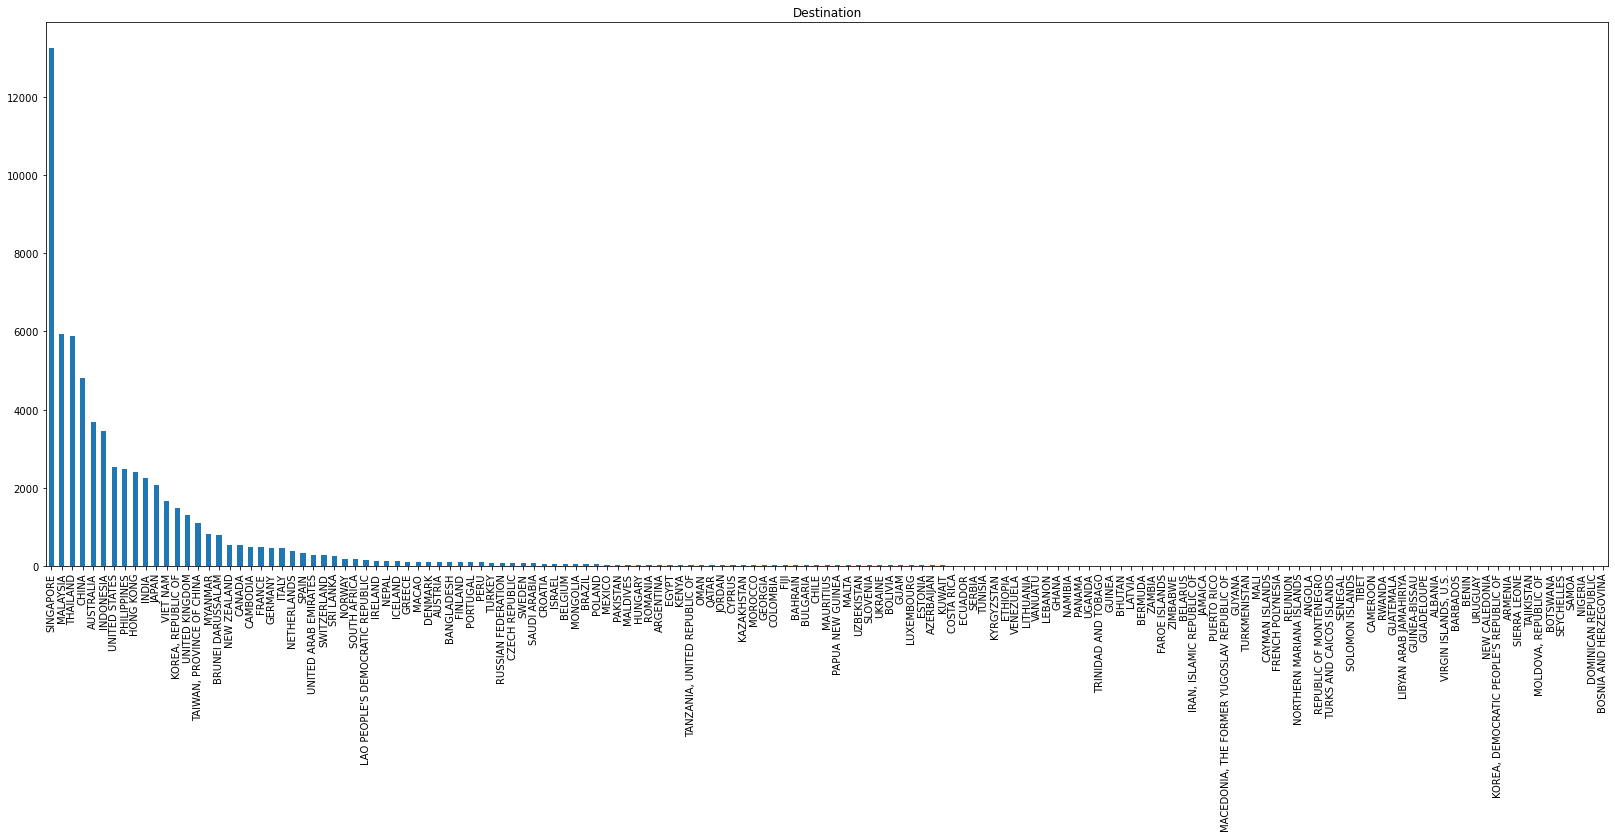

In [11]:
ti_df['Destination'].value_counts().plot(kind='bar',title='Destination',figsize=(28,10))

* Most popular destination is singapore along with that Malaysia , Thailand, China and Australia are popular

Text(0.5, 1.0, 'Duration Distribution')

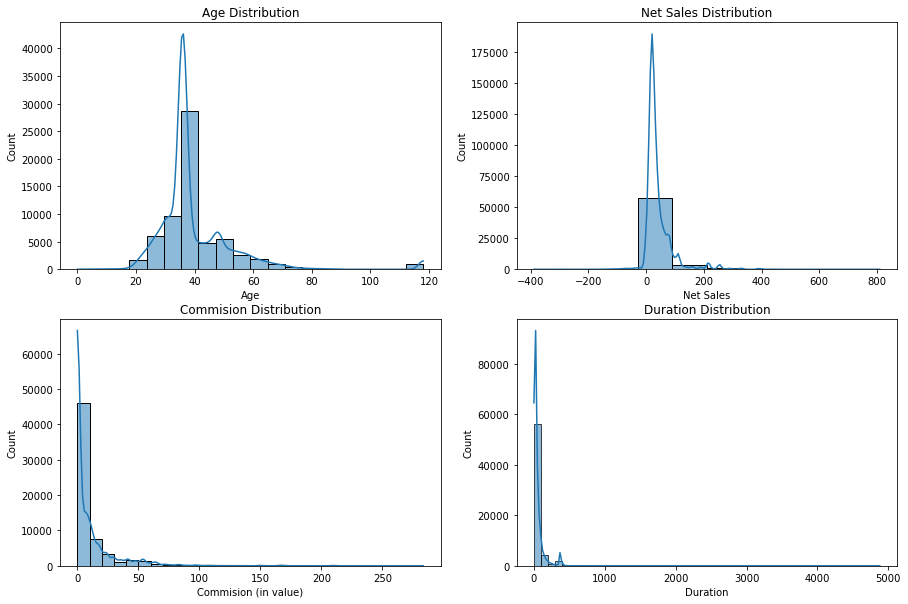

In [12]:
fig = plt.figure(figsize=(15,10))

plt.subplot(2,2,1)
sns.histplot(ti_df['Age'],kde=True,bins=20)
plt.title('Age Distribution')

plt.subplot(2,2,2)
sns.histplot(ti_df['Net Sales'],kde=True,bins=10)
plt.title('Net Sales Distribution')


plt.subplot(2,2,3)
sns.histplot(ti_df['Commision (in value)'],kde=True,binrange=(0,100),bins=10)
plt.title('Commision Distribution')

plt.subplot(2,2,4)
sns.histplot(ti_df['Duration'],kde=True,bins=10,binrange=(1,1000))
plt.title('Duration Distribution')

* No any Distribution is normal distribution
* Commision and Duration are left Skewed

<AxesSubplot:>

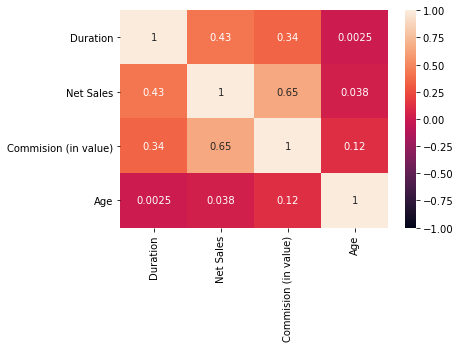

In [13]:
sns.heatmap(ti_df.corr(),annot=True,vmin=-1,vmax=1)

* Commision has some relation with Net Sales

# Bi - variate Analysis

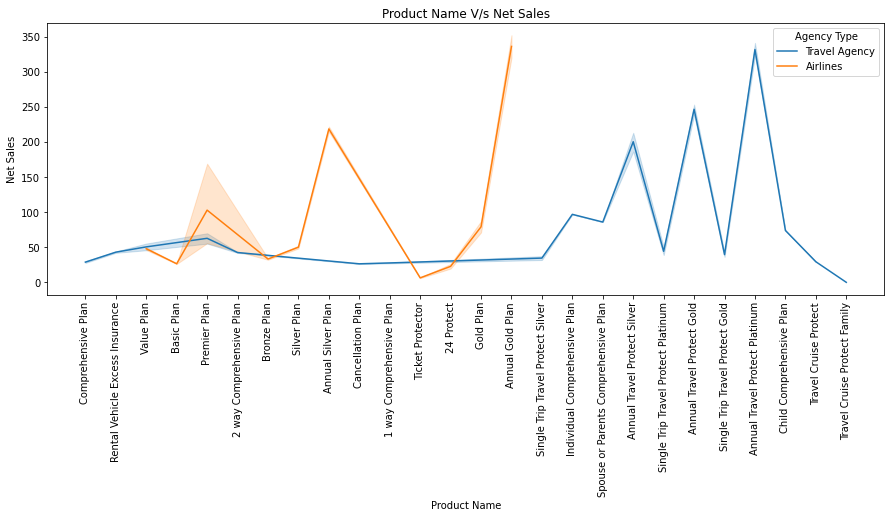

In [14]:
plt.figure(figsize=(15,5))
sns.lineplot(data=ti_df,x='Product Name',y='Net Sales',hue='Agency Type')
plt.title('Product Name V/s Net Sales')
plt.xticks(rotation=90)
plt.show()

**Travel Agency**
* Annual Travel Protect Silver,Annual Travel Protect Gold,Annual Travel Protect Platinium products are highest Net sales.

**Airlines**
* Annual Gold Plan, Annual Silver Plan are Highest Net Sales

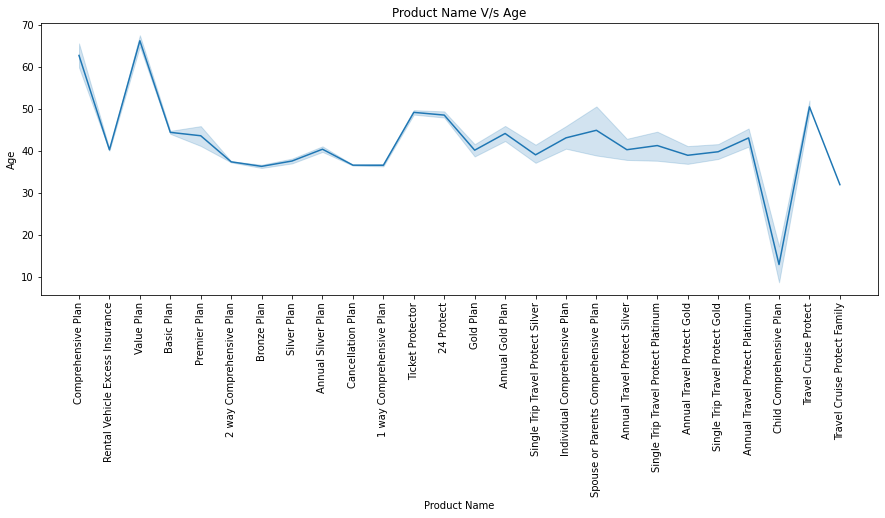

In [15]:
plt.figure(figsize=(15,5))
sns.lineplot(data=ti_df,x='Product Name',y='Age')
plt.title('Product Name V/s Age')
plt.xticks(rotation=90)
plt.show()

* Most Insurance Plans are age between 35 to 55

Text(0.5, 1.0, 'Net Sales V/s Commision')

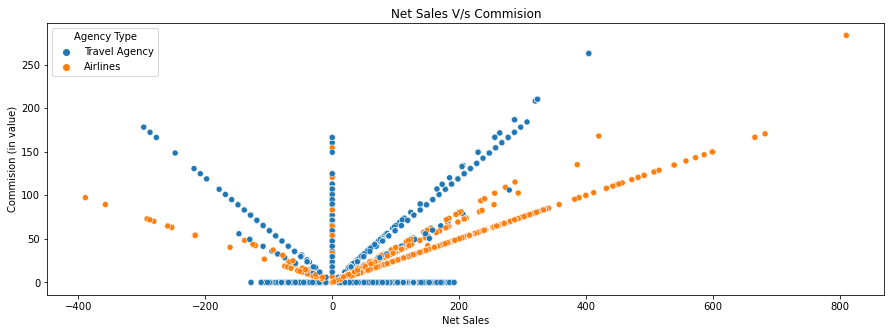

In [16]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=ti_df,x='Net Sales',y='Commision (in value)',hue='Agency Type')
plt.title('Net Sales V/s Commision')

Text(0.5, 1.0, 'Net Sales V/s Duration')

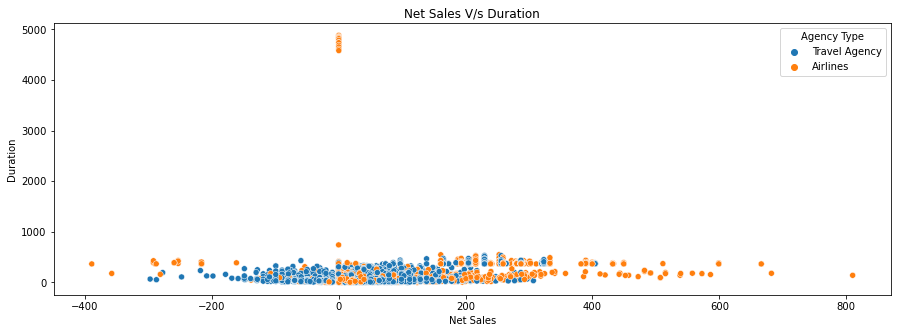

In [17]:
plt.figure(figsize=(15,5))
sns.scatterplot(data=ti_df,x='Net Sales',y='Duration',hue='Agency Type')
plt.title('Net Sales V/s Duration')